In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import numpy as np

# Specify the directory path where the .npy files are located
folder_path = 'Results/'

# Get a list of all .npy files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith('.npy')]

# Load each .npy file and store them in separate variables based on their names
data_dict = {}
for file in file_list:
    file_path = os.path.join(folder_path, file)
    var_name = os.path.splitext(file)[0]  # Extract the variable name without the extension
    data_dict[var_name] = np.load(file_path)


In [3]:
# Create an empty list to store the dataframes for each key
df_list = []

# Iterate over each key-value pair in the dictionary
for key, array in data_dict.items():
    # Create a DataFrame from the NumPy array
    df = pd.DataFrame(array)

    # Add the 'key_name' column with the key name
    df['key_name'] = key

    # Add the 'year' column with the corresponding years
    df['year'] = np.repeat(range(2012, 2020), 1000)

    # Rename the columns
    df.columns = ['Weighted Inversions', 'Number Inversions', 'Top 1', 'Top 8', 'key_name', 'year']

    # Reorder the columns as per your specification
    df = df[['key_name', 'year', 'Weighted Inversions', 'Number Inversions', 'Top 1', 'Top 8']]

    # Append the dataframe to the list
    df_list.append(df)

# Concatenate all the dataframes into a single dataframe
final_df = pd.concat(df_list, ignore_index=True)


In [4]:
metrics = pd.read_excel("Results/number_of_matches.xlsx")

In [5]:
unseeded = final_df[final_df["key_name"].str.contains("false")]
seeded = final_df[final_df["key_name"].str.contains("true")]

In [6]:
replacement_list = ['CSGO Style Tournament', 'Double Elimination', 'GSL', 'Simple Knockout', 'Multi-Stage 8 Groups', 'Round Robin', 'Swiss Style Tournament', 'Triple Knockout']
unseeded["key_name"] = unseeded["key_name"].replace(unseeded["key_name"].unique(), replacement_list)
replacement_list = ['CSGO Style Tournament', 'Double Elimination', 'GSL', 'Simple Knockout', 'Multi-Stage 8 Groups', 'Swiss Style Tournament', 'Triple Knockout']
seeded["key_name"] = seeded["key_name"].replace(seeded["key_name"].unique(), replacement_list)

C:\Users\Noman\AppData\Local\Temp\ipykernel_3240\2804408501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseeded["key_name"] = unseeded["key_name"].replace(unseeded["key_name"].unique(), replacement_list)
C:\Users\Noman\AppData\Local\Temp\ipykernel_3240\2804408501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seeded["key_name"] = seeded["key_name"].replace(seeded["key_name"].unique(), replacement_list)


In [7]:
grouped = seeded.groupby(by = "key_name")[["Weighted Inversions", "Number Inversions", "Top 1", "Top 8"]].mean()
unseeded_grouped = unseeded.groupby(by = "key_name")[["Weighted Inversions", "Number Inversions", "Top 1", "Top 8"]].mean()

In [8]:
merged_df = metrics.merge(grouped, left_on='Tournament', right_on='key_name', how = 'left')
merged_df = merged_df.merge(unseeded_grouped, left_on='Tournament', right_on='key_name', how = 'left', suffixes=('', ' (US)'))

In [9]:
merged_df

,Tournament,Number of Matches,Weighted Inversions,Number Inversions,Top 1,Top 8,Weighted Inversions (US),Number Inversions (US),Top 1 (US),Top 8 (US)
0,GSL,221,65.919444,22.557375,5.004875,6.250535,69.702926,21.916000,5.212375,7.343931
1,Multi-Stage 8 Groups,63,64.722453,21.156375,6.755000,7.804498,67.831256,20.727125,6.907375,8.491764
2,Round Robin,496,NaN,NaN,NaN,NaN,22.296002,12.912000,3.349250,6.402554
3,Swiss Style Tournament,96,54.701783,18.570625,6.055750,8.405087,56.877436,18.268375,6.763500,9.046556
4,CSGO Style Tournament,71,52.188842,17.653250,6.016375,8.338594,54.601907,17.727375,6.499625,8.825641
5,Simple Knockout,31,86.027424,25.816625,6.147625,8.215715,78.809895,21.073250,7.908250,9.207854
6,Triple Knockout,93,73.870235,25.625500,4.658375,7.249487,69.729690,20.947375,6.778375,8.662542
7,Double Elimination,62,50.918337,18.140750,6.504500,8.853941,56.244605,18.024375,7.966625,9.905833


In [10]:
merged_df.to_csv("Results/metrics.csv")
final_df.to_csv("Results/rawresults.csv")

In [11]:
merged_df.loc[2, ["Weighted Inversions", "Number Inversions", "Top 1", "Top 8"]]  = merged_df.loc[2, ["Weighted Inversions (US)", "Number Inversions (US)", "Top 1 (US)", "Top 8 (US)"]].values

In [12]:
grouped2 = pd.concat([grouped, unseeded_grouped])
grouped3 = grouped2.merge(metrics, left_on="key_name", right_on="Tournament", how = "left")
grouped3.loc[0:6, "Seeded"] = "Seeded"
grouped3.loc[7:, "Seeded"] = "Unseeded"

In [13]:
row = grouped3.loc[11]
# Remove the row from the DataFrame
grouped3.drop(11, inplace=True)
# Append the extracted row to the DataFrame
grouped3 = grouped3.append(row)
# Reset the index of the DataFrame
grouped3.reset_index(drop=True, inplace=True)

grouped3.loc[15] = grouped3.loc[14]
grouped3.at[15, "Seeded"] = "Seeded"
grouped3

C:\Users\Noman\AppData\Local\Temp\ipykernel_3240\1513698552.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped3 = grouped3.append(row)


,Weighted Inversions,Number Inversions,Top 1,Top 8,Tournament,Number of Matches,Seeded
0,52.188842,17.653250,6.016375,8.338594,CSGO Style Tournament,71,Seeded
1,50.918337,18.140750,6.504500,8.853941,Double Elimination,62,Seeded
2,65.919444,22.557375,5.004875,6.250535,GSL,221,Seeded
3,64.722453,21.156375,6.755000,7.804498,Multi-Stage 8 Groups,63,Seeded
4,86.027424,25.816625,6.147625,8.215715,Simple Knockout,31,Seeded
5,54.701783,18.570625,6.055750,8.405087,Swiss Style Tournament,96,Seeded
6,73.870235,25.625500,4.658375,7.249487,Triple Knockout,93,Seeded
7,54.601907,17.727375,6.499625,8.825641,CSGO Style Tournament,71,Unseeded
8,56.244605,18.024375,7.966625,9.905833,Double Elimination,62,Unseeded
9,69.702926,21.916000,5.212375,7.343931,GSL,221,Unseeded


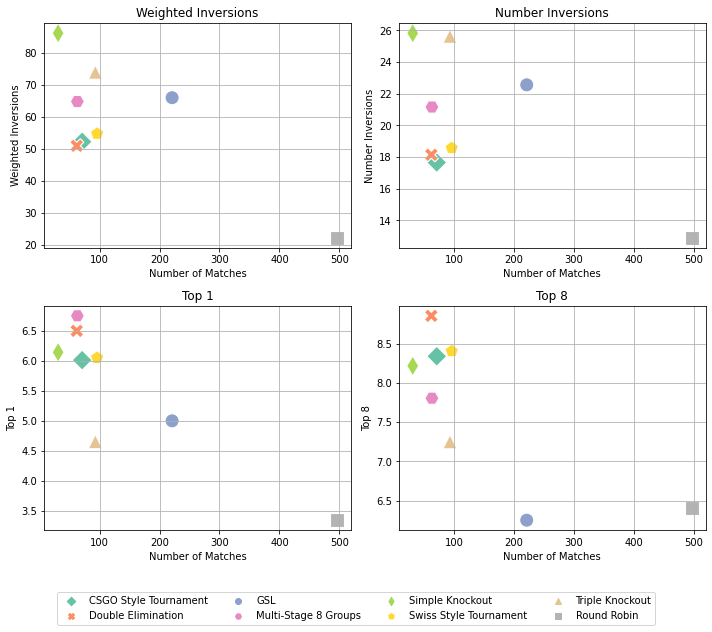

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


df = grouped3[grouped3["Seeded"] == "Seeded"].copy()

shapes = ['D', 'X', 'o', 'H', 'd', 'p', '^', 's']

sns.set_palette("Set2")
# Create a figure with subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Create a scatterplot for each metric
for i, metric in enumerate(df.columns[0:4]):
    ax = axes[i]
    sns.scatterplot(data=df, x='Number of Matches', y=metric, hue = "Tournament", style = "Tournament", markers = shapes, s = 200, ax=ax)
    ax.set_title(f'{metric}')
    ax.set_xlabel('Number of Matches')
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.get_legend().remove()

# Adjust spacing between subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor = (0.5, -0.1), ncol = 4)

plt.tight_layout()

# Show the plots
plt.show()


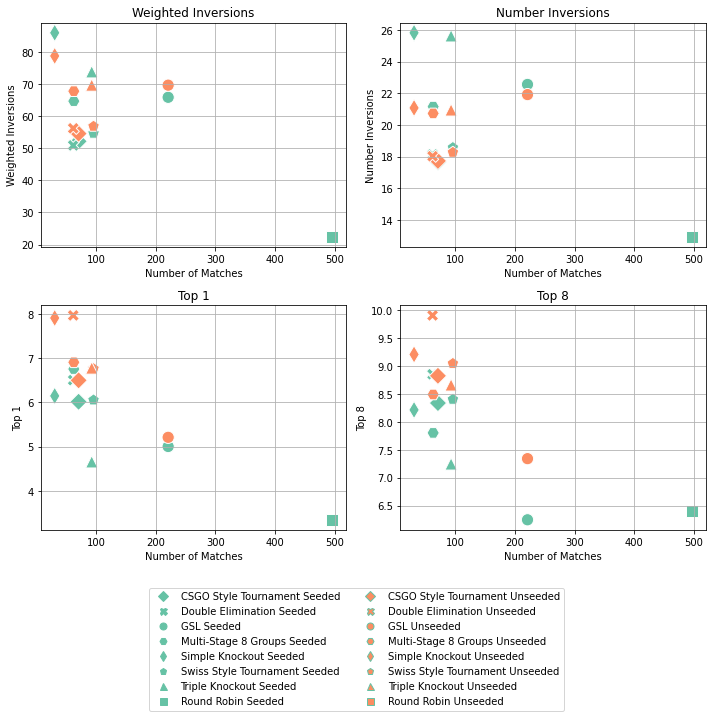

In [15]:
sns.set_palette("Set2")
# Create a figure with subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

shapes = ['D', 'X', 'o', 'H', 'd', 'p', '^', 's']

pal = {'Seeded': '#66c2a5', 'Unseeded': '#fc8d62'}


# Create a scatterplot for each metric
for i, metric in enumerate(grouped3.columns[0:4]):
    ax = axes[i]
    sns.scatterplot(data=grouped3, x='Number of Matches', y=metric, hue = "Seeded", style = "Tournament", palette=pal, markers=shapes, s = 150, ax=ax)
    ax.set_title(f'{metric}')
    ax.set_xlabel('Number of Matches')
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.get_legend().remove()

# Adjust spacing between subplots
legend_handles = []
legend_labels = []
tournament_list = list(grouped3["Tournament"].unique())


for seeds in grouped3["Seeded"].unique():
    for tournament in tournament_list:
        legend_labels.append(f"{tournament} {seeds}")
        handle = plt.Line2D([], [], linestyle='None', marker = shapes[tournament_list.index(tournament)], markersize=7, markerfacecolor=pal[seeds])
        legend_handles.append(handle)


fig.legend(legend_handles, legend_labels, loc='lower center', bbox_to_anchor = (0.5, -0.25), ncol = 2)

plt.tight_layout()

# Show the plots
plt.show()


In [16]:
import pandas as pd
import os

In [17]:
folder_path = "Data/"
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

In [18]:
data_dict = {}
for file in file_list:
    file_path = os.path.join(folder_path, file)
    var_name = os.path.splitext(file)[0]  # Extract the variable name without the extension
    data_dict[var_name] = pd.read_csv(file_path)

In [19]:
import pandas as pd

# Assuming you have a dictionary called 'dataframes' containing the dataframes

# Create an empty list to store the results
results = []

# Iterate over the dictionary items
for tournament, df in data_dict.items():
    # Extract the ratings column from the dataframe
    ratings = df['ratings']

    # Calculate the mean and standard deviation of the ratings column
    mean = ratings.mean()
    std_dev = ratings.std()

    # Create a new dataframe for the current tournament
    tournament_results = pd.DataFrame({'Tournament': [tournament],
                                       'Mean': [mean],
                                       'Standard Deviation': [std_dev]})

    # Append the current tournament results to the list
    results.append(tournament_results)

# Concatenate the results dataframes into a single dataframe
results_df = pd.concat(results, ignore_index=True)

# Print the results dataframe
print(results_df)


  Tournament      Mean  Standard Deviation
0    2012GSL  0.781901            0.484152
1    2013GSL  1.129402            0.524324
2    2014GSL  1.363457            0.599131
3    2015GSL  1.280465            0.571639
4    2016GSL  1.262486            0.699357
5    2017GSL  1.622285            0.556637
6    2018GSL  1.636265            0.482078
7    2019GSL  1.681567            0.484694


In [20]:
rename_dict = {
    "csgoswiss_false": "CSGO Swiss Unseeded",
    "csgoswiss_true": "CSGO Swiss Seeded",
    "swiss_true": "Swiss Seeded",
    "swiss_false": "Swiss Unseeded",
    "GSL_true": "GSL Seeded",
    "GSL_false": "GSL Unseeded",
    "dualtournament_true": "Double Elimination Seeded",
    "dualtournament_false": "Double Elimination Unseeded",
    "knockout_true": "Simple Knockout Seeded",
    "knockout_false": "Simple Knockout Unseeded",
    "tripleknockouts_false": "Triple Knockout Unseeded",
    "tripleknockouts_true": "Triple Knockout Seeded",
    "multistage_true": "Multi-Stage Seeded",
    "multistage_false": "Multi-Stage Unseeded",
    "roundrobin_false": "Round Robin",
}

In [21]:
final_df["key_name"].replace(rename_dict, inplace= True)

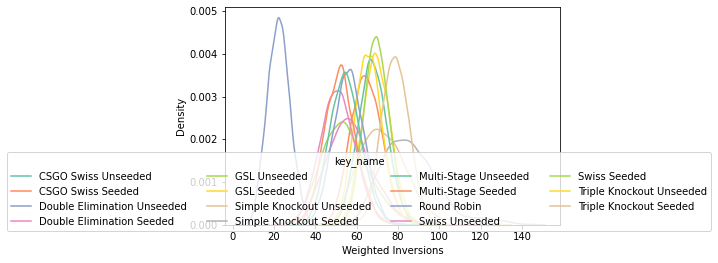

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

melted_df = final_df.melt(id_vars = ["key_name", "year"], value_name= "Metrics")

g = sns.kdeplot(
    data = final_df[["key_name", "Weighted Inversions"]],
    x = "Weighted Inversions",
    hue = "key_name",
    palette="Set2"
)

sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

sns.move_legend(g, loc='lower center', bbox_to_anchor = (0.4, -0.05), ncol = 4)

plt.show()

In [23]:
def calculate_running_mean(arr):
    running_means = []
    current_sum = 0
    for i, num in enumerate(arr, 1):
        current_sum += num
        running_mean = current_sum / i
        running_means.append(running_mean)
    return running_means

In [50]:
filt = (final_df["key_name"] == "CSGO Swiss Unseeded") &  (final_df["year"] == 2012)
running_mean = calculate_running_mean(final_df[filt]["Weighted Inversions"].values)

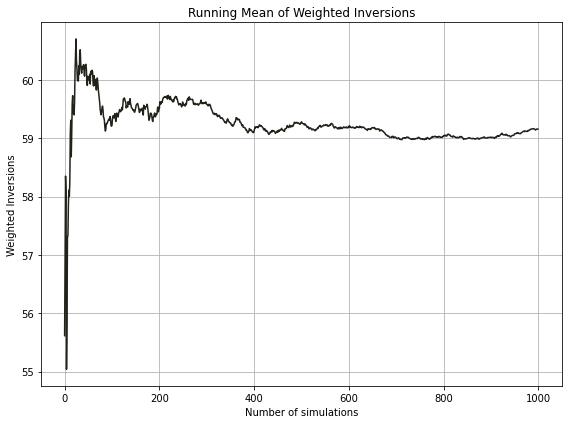

In [79]:
X = np.arange(0, 1000, 1)

hfont = {'fontname':'Helvetica'}
fig = plt.figure(figsize=(8, 6))


plt.plot(X, running_mean, lw = 1.5, color = "#22221B")
plt.title("Running Mean of Weighted Inversions", **hfont)
plt.xlabel("Number of simulations")
plt.ylabel("Weighted Inversions")
plt.tight_layout()
plt.grid()
plt.show()

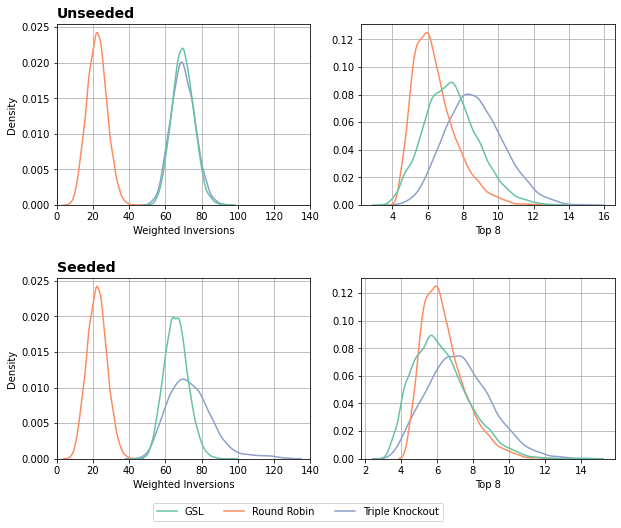

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'tournament' and 'metric'

# Specify the tournament names
tournament_list = ['Round Robin', 'GSL Unseeded', 'Triple Knockout Unseeded']
tournament_list2 = ['Round Robin', 'GSL Seeded', 'Triple Knockout Seeded']

# Filter the DataFrame based on the tournament list
filtered_df =final_df[final_df['key_name'].isin(tournament_list)]
filtered_df2 =final_df[final_df['key_name'].isin(tournament_list2)]


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# Create a KDE plot of the metric for the selected tournaments
sns.kdeplot(data=filtered_df, x='Weighted Inversions', hue = "key_name", ax = axes[0,0])
axes[0,0].set_xlim(0, 140)

sns.kdeplot(data=filtered_df, x='Top 8', hue = "key_name", ax = axes[0,1])

sns.kdeplot(data=filtered_df2, x='Weighted Inversions', hue = "key_name", ax = axes[1,0])
axes[1,0].set_xlim(0, 140)

sns.kdeplot(data=filtered_df2, x='Top 8', hue = "key_name", ax = axes[1,1])


axes[0,0].legend_.remove()
axes[0,1].legend_.remove()
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()

axes[0, 1].set(ylabel='')
axes[1, 1].set(ylabel='')

legend_elements = [plt.Line2D([0], [0], color=sns.color_palette('Set2')[0], label='GSL'),
                   plt.Line2D([0], [0], color=sns.color_palette('Set2')[1], label='Round Robin'),
                   plt.Line2D([0], [0], color=sns.color_palette('Set2')[2], label='Triple Knockout')]

# Add custom legend elements to the plot
plt.legend(handles=legend_elements)

sns.move_legend(plt.gca(), loc='lower center', bbox_to_anchor = (-0.25, -0.37), ncol = 3)

axes[0, 0].set_title('Unseeded', loc='left', fontsize = 14, fontweight = "bold")
axes[1, 0].set_title('Seeded', loc='left', fontsize = 14, fontweight = "bold")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.4)

for ax in axes.flat:
    ax.grid(True, which = 'both')

# Display the KDE plot
plt.show()


In [189]:
results_df['year'] = results_df['Tournament'].str.slice(stop=-3)
results_df.drop("Tournament", axis=1, inplace=True)


In [194]:
results_df['year'] = results_df.year.astype(int)

In [195]:
merged_results = final_df.merge(results_df, on = "year", how = "left")

In [202]:
merged_results["Standard Deviation"] = merged_results["Standard Deviation"].round(2)

In [226]:
merged_results[merged_results["key_name"].str.contains("Seeded")]

,key_name,year,Weighted Inversions,Number Inversions,Top 1,Top 8,Mean,Standard Deviation
8000,CSGO Swiss Seeded,2012,55.725174,17.0,2.0,8.875,0.781901,0.48
8001,CSGO Swiss Seeded,2012,57.775484,17.0,9.0,8.500,0.781901,0.48
8002,CSGO Swiss Seeded,2012,59.657768,17.0,3.0,8.750,0.781901,0.48
8003,CSGO Swiss Seeded,2012,52.211312,17.0,2.0,6.125,0.781901,0.48
8004,CSGO Swiss Seeded,2012,51.654547,18.0,5.0,7.375,0.781901,0.48
...,...,...,...,...,...,...,...,...
119995,Triple Knockout Seeded,2019,89.069679,24.0,10.0,8.125,1.681567,0.48
119996,Triple Knockout Seeded,2019,68.815093,24.0,10.0,9.000,1.681567,0.48
119997,Triple Knockout Seeded,2019,69.712832,28.0,7.0,9.125,1.681567,0.48
119998,Triple Knockout Seeded,2019,70.033401,29.0,1.0,7.000,1.681567,0.48


<Figure size 1440x1152 with 0 Axes>

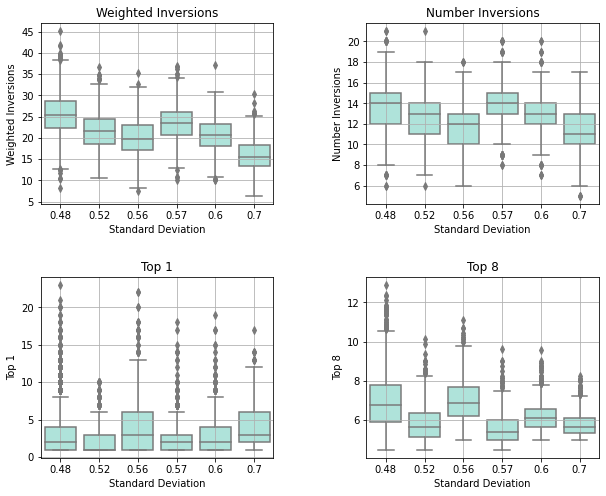

In [268]:
plt.figure(figsize=(20, 16))

seeded_df = merged_results[merged_results["key_name"].str.contains("Seeded")]
unseeded_df = merged_results[merged_results["key_name"].str.contains("Unseeded")]
filt = merged_results[merged_results["key_name"].str.contains("Round Robin")]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, metric in enumerate(filt.columns[2:6]):
    ax = axes[i]
    sns.boxplot(data = filt, x="Standard Deviation", y=metric, ax=ax, color = "#A6ECE0")
    ax.set_title(f'{metric}')
    ax.set_xlabel('Standard Deviation')
    ax.set_ylabel(metric)
    ax.grid(True)
    plt.subplots_adjust(wspace=0.4)
    plt.subplots_adjust(hspace=0.4)

In [241]:
year_separation = merged_results.groupby(by = ["key_name", "year"]).mean()

In [247]:
year_separation

Weighted Inversions  Number Inversions  Top 1  \
key_name                 year                                                  
CSGO Swiss Seeded        2012            51.773104             17.466  4.958   
                         2013            54.061668             18.233  5.234   
                         2014            44.751229             16.928  6.397   
                         2015            50.717918             17.676  5.676   
                         2016            57.609725             18.459  6.613   
...                                            ...                ...    ...   
Triple Knockout Unseeded 2015            71.824790             21.342  6.078   
                         2016            63.091386             20.519  6.715   
                         2017            67.421307             20.601  7.718   
                         2018            76.035694             21.446  7.566   
                         2019            69.005515             20.440  7.817   

                                  Top 8      Mean  Standard Deviation  
key_name                 year                                          
CSGO Swiss Seeded        2012  8.096875  0.781901                0.48  
                         2013  7.698750  1.129402                0.52  
                         2014  7.374222  1.363457                0.60  
                         2015  7.994556  1.280465                0.57  
                         2016  8.970250  1.262486                0.70  
...                                 ...       ...                 ...  
Triple Knockout Unseeded 2015  8.104125  1.280465                0.57  
                         2016  8.122556  1.262486                0.70  
                         2017  9.062000  1.622285                0.56  
                         2018  9.341000  1.636265                0.48  
                         2019  9.438556  1.681567                0.48  

[120 rows x 6 columns]

In [249]:
year_separation2 = year_separation.copy()

In [255]:
import pandas as pd

# Assuming your DataFrame is named year_separation2 with the index as the column you want to split

# Reset the index and rename the index column
year_separation2.reset_index(inplace=True)
year_separation2.rename(columns={'index': 'index_column'}, inplace=True)

# Split the index values and create a new column
year_separation2['Seeded Status'] = year_separation2['key_name'].str.split().str[-1]
year_separation2['key_name'] = year_separation2['key_name'].str.replace('Seeded', '').str.replace('Unseeded', '')

# Display the updated DataFrame
year_separation2

,index_column,index_column,index_column,level_0,index_column,key_name,year,Weighted Inversions,Number Inversions,Top 1,Top 8,Mean,Standard Deviation,Seeded Status
0,0,0,0,0,0,CSGO Swiss,2012,51.773104,17.466,4.958,8.096875,0.781901,0.48,Seeded
1,1,1,1,1,1,CSGO Swiss,2013,54.061668,18.233,5.234,7.698750,1.129402,0.52,Seeded
2,2,2,2,2,2,CSGO Swiss,2014,44.751229,16.928,6.397,7.374222,1.363457,0.60,Seeded
3,3,3,3,3,3,CSGO Swiss,2015,50.717918,17.676,5.676,7.994556,1.280465,0.57,Seeded
4,4,4,4,4,4,CSGO Swiss,2016,57.609725,18.459,6.613,8.970250,1.262486,0.70,Seeded
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,115,115,115,115,Triple Knockout,2015,71.824790,21.342,6.078,8.104125,1.280465,0.57,Unseeded
116,116,116,116,116,116,Triple Knockout,2016,63.091386,20.519,6.715,8.122556,1.262486,0.70,Unseeded
117,117,117,117,117,117,Triple Knockout,2017,67.421307,20.601,7.718,9.062000,1.622285,0.56,Unseeded
118,118,118,118,118,118,Triple Knockout,2018,76.035694,21.446,7.566,9.341000,1.636265,0.48,Unseeded


In [256]:
year_separation2.to_csv("yearsep.csv")